In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import yt
%pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import glob
from plot_toomre_q_projection import field_from_sliceplot
from smartstar_find import ss_properties
from plot_disc_projections import _make_disk_L
from plot_multi_projections import tidy_data_labels
from yt.utilities.math_utils import ortho_find
from plot_radial_profile_from_frb import extract_dd_segment, extract_simulation_name
from find_fourier_modes import get_theta_values, extract_dd_number

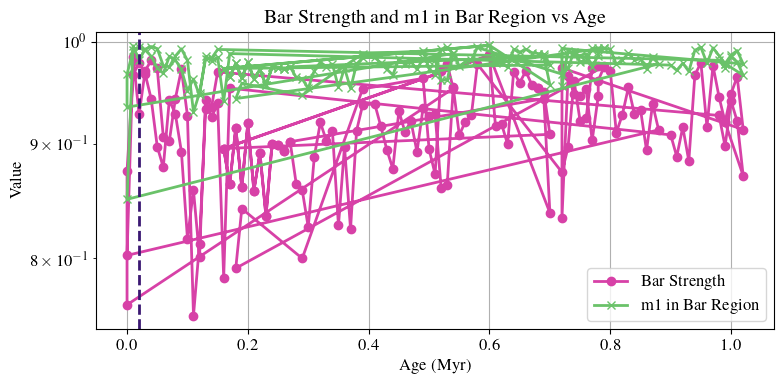

In [24]:
# Parsing the data from the file
data_file = 'bar_strengths_and_phase_angle_width_pc_0.2.txt'
ages = []
bar_strengths = []
bar_radii = []
m1_in_bar = []

with open(data_file, 'r') as f:
    for line in f:
        if "DD:" in line:
            split_line = line.split(',')
            age = float(split_line[1].split(':')[1].strip().split(' ')[0])
            bar_strength = float(split_line[7].split(':')[1].strip())
            bar_radius = float(split_line[6].split(':')[1].strip())
            m1 = float(split_line[8].split(':')[1].strip())
            
            ages.append(age)
            bar_strengths.append(bar_strength)
            bar_radii.append(bar_radius)
            m1_in_bar.append(m1)

# Plotting the data
plt.figure(figsize=(8, 4))
c1 = (0.843, 0.255, 0.655)
c2 = (0.227, 0.090, 0.447)
c3 = (0.325, 0.596, 0.745)
c4 = (0.4157, 0.7608, 0.4118)
plt.plot(ages, bar_strengths, label='Bar Strength', marker='o', color=c1)
plt.plot(ages, m1_in_bar, label='m1 in Bar Region', marker='x', color=c4)
#plt.plot(ages, bar_radii, label='Bar Radius', marker='x', color=c3)
plt.axvline(x=0.02, color=c2, linestyle='--')
plt.yscale('log')
plt.xlabel('Age (Myr)')
plt.ylabel('Value')
plt.title('Bar Strength and m1 in Bar Region vs Age')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
def find_bar_radius(phi_2_values, radii, var_deg=3):
    """
    Iteratively find the variance in phi_2 from the array phi_2_values, 
    starting from index 0. Once the variance exceeds 3 degrees, return the 
    corresponding argument from the radius array to signal the radius of the bar feature.
    
    Parameters:
    - phi_2_values: List or array of phi_2 values.
    - radii: Corresponding radii for each phi_2 value.
    
    Returns:
    - bar_radius: Radius at which the variance in phi_2 exceeds 3 degrees.
    """
    
    for i in range(1, len(phi_2_values) + 1): # Start from the 2nd value and expand the range
        segment = phi_2_values[:i]
        var_phi_2 = np.var(segment)
        
        if np.sqrt(var_phi_2) > var_deg:  # Check the standard deviation (square root of variance)
            return radii[i-1], i-1
    
    # Return None if the function didn't find a suitable radius
    return None

In [10]:
width_pc_list = [0.05, 0.1, 0.2, 0.3] # fill this with corresponding width_pc values
width_pc_list = [0.1]

# load data
# Get a list of directories matching the pattern DD0*
dir_pattern = "/ceph/cephfs/sgordon/pleiades/seed1-bh-only/270msun/replicating-beckmann/1B.m16-4dx/DD0*"
dir_pattern = "/ceph/cephfs/sgordon/pleiades/seed2-bh-only/270msun/replicating-beckmann-2/2B.RSb08/2B.RSb08-2/DD0*"
dirs = glob.glob(dir_pattern)

# Filter out directories such that only those which have a child file with the same name are retained
filtered_dirs = [d for d in dirs if os.path.exists(os.path.join(d, os.path.basename(d)))]

# Construct the full path to the desired files
files_to_load = [os.path.join(d, os.path.basename(d)) for d in filtered_dirs]
files_to_load.sort(key=extract_dd_number)
ds_list = yt.DatasetSeries(files_to_load)[70:80]
ds_list

yt : [INFO     ] 2023-10-26 13:55:31,858 Parameters: current_time              = 21.946100018113
yt : [INFO     ] 2023-10-26 13:55:31,860 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 13:55:31,861 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 13:55:31,862 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 13:55:31,863 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 13:55:31,863 Parameters: current_redshift          = 19.171253245317
yt : [INFO     ] 2023-10-26 13:55:31,864 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 13:55:31,865 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 13:55:31,866 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 13:55:31,866 Parameters: hubble_constant           = 0.71


ds =  DD0269


Parsing Hierarchy : 100%|██████████| 5812/5812 [00:01<00:00, 3833.77it/s] 
yt : [INFO     ] 2023-10-26 13:55:33,529 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 14:03:07,645 xlim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:03:07,691 ylim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:03:07,698 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 14:03:08,892 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 14:03:10,196 Making a fixed resolution buffer of (radius) 2048 by 2048


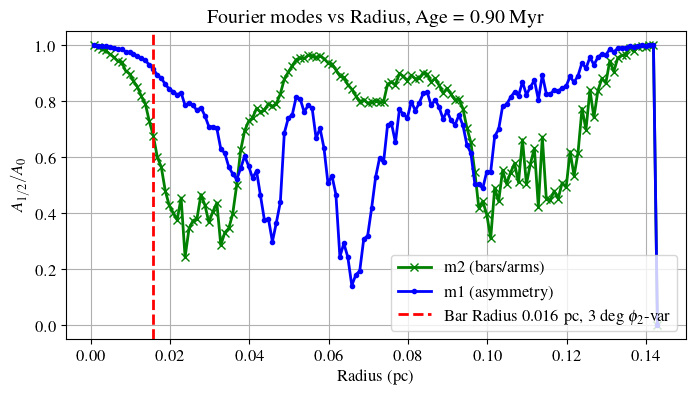

yt : [INFO     ] 2023-10-26 14:03:45,750 Parameters: current_time              = 21.947216922113
yt : [INFO     ] 2023-10-26 14:03:45,752 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 14:03:45,753 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 14:03:45,754 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 14:03:45,755 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 14:03:45,756 Parameters: current_redshift          = 19.17056881412
yt : [INFO     ] 2023-10-26 14:03:45,756 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 14:03:45,757 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 14:03:45,758 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 14:03:45,759 Parameters: hubble_constant           = 0.71


DD: DD0269, age: 0.90 Myr, m2 mean: 0.7262, m2 var: 0.2183, m1_avg: 0.7390, m1_var: 0.2158, Bar radius: 0.0158, Bar strength: 0.9085, m1 in bar region: 0.9764, phi_2_mean: 22.7764 deg, phi_2_var: 46.70641 deg 

ds =  DD0270


Parsing Hierarchy : 100%|██████████| 5855/5855 [00:00<00:00, 14705.32it/s]
yt : [INFO     ] 2023-10-26 14:03:46,308 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 14:13:20,697 xlim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:13:20,703 ylim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:13:20,711 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 14:13:21,668 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 14:13:22,100 Making a fixed resolution buffer of (radius) 2048 by 2048


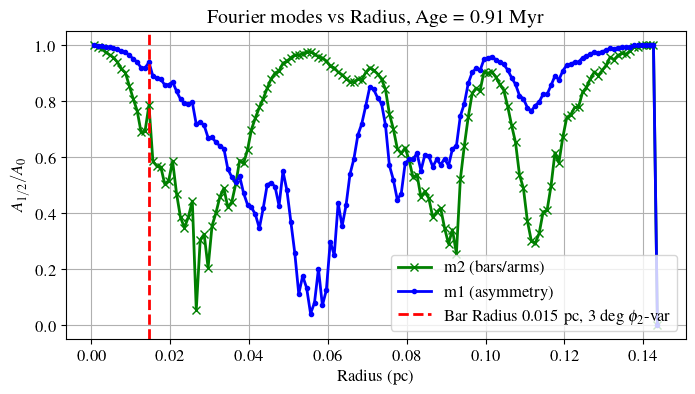

yt : [INFO     ] 2023-10-26 14:13:28,500 Parameters: current_time              = 21.948333826113
yt : [INFO     ] 2023-10-26 14:13:28,501 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 14:13:28,502 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 14:13:28,502 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 14:13:28,503 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 14:13:28,503 Parameters: current_redshift          = 19.169884440974
yt : [INFO     ] 2023-10-26 14:13:28,504 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 14:13:28,504 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 14:13:28,504 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 14:13:28,505 Parameters: hubble_constant           = 0.71


DD: DD0270, age: 0.91 Myr, m2 mean: 0.7146, m2 var: 0.2393, m1_avg: 0.7192, m1_var: 0.2556, Bar radius: 0.0146, Bar strength: 0.8884, m1 in bar region: 0.9711, phi_2_mean: -15.6057 deg, phi_2_var: 50.96545 deg 

ds =  DD0271


Parsing Hierarchy : 100%|██████████| 5904/5904 [00:00<00:00, 13365.05it/s]
yt : [INFO     ] 2023-10-26 14:13:29,153 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 14:21:43,166 xlim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:21:43,170 ylim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:21:43,177 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 14:21:44,255 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 14:21:45,203 Making a fixed resolution buffer of (radius) 2048 by 2048


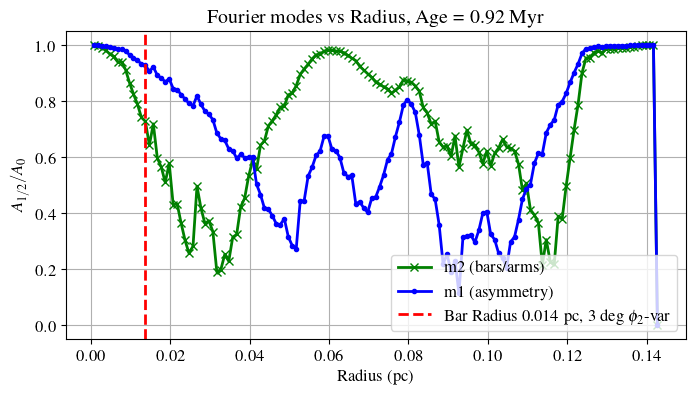

yt : [INFO     ] 2023-10-26 14:22:01,255 Parameters: current_time              = 21.949450730113
yt : [INFO     ] 2023-10-26 14:22:01,256 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 14:22:01,256 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 14:22:01,257 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 14:22:01,257 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 14:22:01,258 Parameters: current_redshift          = 19.169200125872
yt : [INFO     ] 2023-10-26 14:22:01,258 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 14:22:01,258 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 14:22:01,259 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 14:22:01,259 Parameters: hubble_constant           = 0.71


DD: DD0271, age: 0.92 Myr, m2 mean: 0.7087, m2 var: 0.2456, m1_avg: 0.6556, m1_var: 0.2577, Bar radius: 0.0137, Bar strength: 0.9158, m1 in bar region: 0.9783, phi_2_mean: -13.3172 deg, phi_2_var: 61.42560 deg 

ds =  DD0272


Parsing Hierarchy : 100%|██████████| 5886/5886 [00:03<00:00, 1827.28it/s]
yt : [INFO     ] 2023-10-26 14:22:04,699 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 14:28:01,741 xlim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:28:01,744 ylim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:28:01,748 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 14:28:02,575 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 14:28:03,194 Making a fixed resolution buffer of (radius) 2048 by 2048


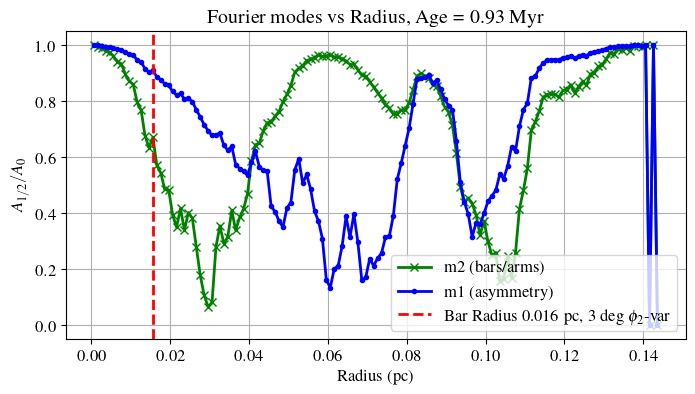

yt : [INFO     ] 2023-10-26 14:28:18,360 Parameters: current_time              = 21.950567634113
yt : [INFO     ] 2023-10-26 14:28:18,361 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 14:28:18,362 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 14:28:18,363 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 14:28:18,364 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 14:28:18,365 Parameters: current_redshift          = 19.168515868806
yt : [INFO     ] 2023-10-26 14:28:18,365 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 14:28:18,366 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 14:28:18,367 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 14:28:18,368 Parameters: hubble_constant           = 0.71


DD: DD0272, age: 0.93 Myr, m2 mean: 0.6977, m2 var: 0.2707, m1_avg: 0.6827, m1_var: 0.2711, Bar radius: 0.0156, Bar strength: 0.8843, m1 in bar region: 0.9700, phi_2_mean: -23.6358 deg, phi_2_var: 52.53704 deg 

ds =  DD0273


Parsing Hierarchy : 100%|██████████| 5877/5877 [00:00<00:00, 16007.56it/s]
yt : [INFO     ] 2023-10-26 14:28:18,888 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 14:34:12,610 xlim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:34:12,625 ylim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:34:12,634 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 14:34:13,591 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 14:34:14,482 Making a fixed resolution buffer of (radius) 2048 by 2048


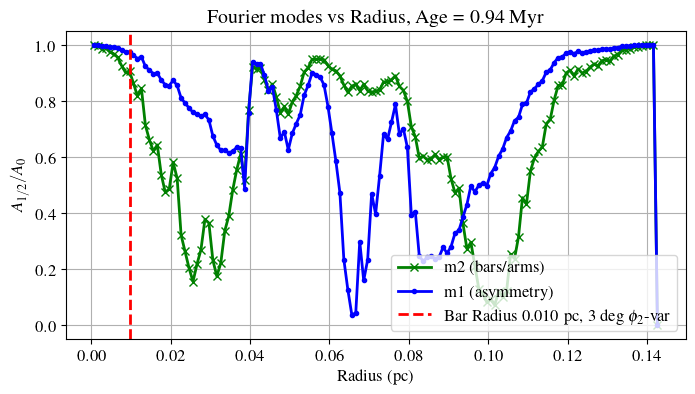

yt : [INFO     ] 2023-10-26 14:34:36,440 Parameters: current_time              = 21.951684538113
yt : [INFO     ] 2023-10-26 14:34:36,441 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 14:34:36,442 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 14:34:36,443 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 14:34:36,444 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 14:34:36,445 Parameters: current_redshift          = 19.167831669769
yt : [INFO     ] 2023-10-26 14:34:36,446 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 14:34:36,446 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 14:34:36,447 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 14:34:36,448 Parameters: hubble_constant           = 0.71


DD: DD0273, age: 0.94 Myr, m2 mean: 0.6852, m2 var: 0.2800, m1_avg: 0.7210, m1_var: 0.2601, Bar radius: 0.0096, Bar strength: 0.9665, m1 in bar region: 0.9915, phi_2_mean: -3.7075 deg, phi_2_var: 56.79354 deg 

ds =  DD0274


Parsing Hierarchy : 100%|██████████| 5921/5921 [00:00<00:00, 14883.60it/s]
yt : [INFO     ] 2023-10-26 14:34:37,007 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 14:40:49,005 xlim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:40:49,027 ylim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:40:49,034 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 14:40:50,147 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 14:40:50,712 Making a fixed resolution buffer of (radius) 2048 by 2048


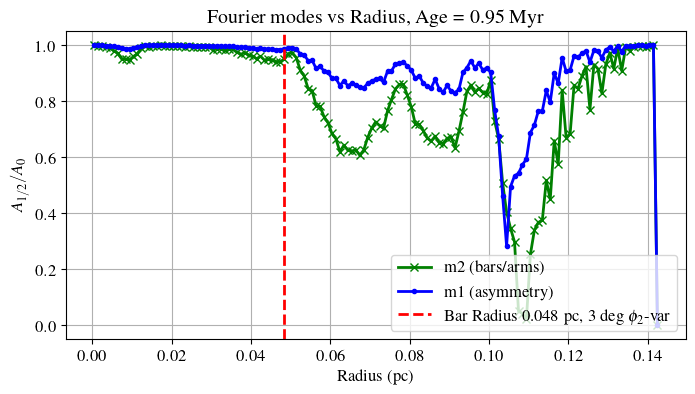

yt : [INFO     ] 2023-10-26 14:41:15,424 Parameters: current_time              = 21.952801442113
yt : [INFO     ] 2023-10-26 14:41:15,426 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 14:41:15,427 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 14:41:15,428 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 14:41:15,429 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 14:41:15,430 Parameters: current_redshift          = 19.167147528751
yt : [INFO     ] 2023-10-26 14:41:15,430 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 14:41:15,431 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 14:41:15,432 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 14:41:15,433 Parameters: hubble_constant           = 0.71


DD: DD0274, age: 0.95 Myr, m2 mean: 0.8072, m2 var: 0.2208, m1_avg: 0.9089, m1_var: 0.1421, Bar radius: 0.0484, Bar strength: 0.9786, m1 in bar region: 0.9944, phi_2_mean: 4.6727 deg, phi_2_var: 15.84520 deg 

ds =  DD0275


Parsing Hierarchy : 100%|██████████| 5863/5863 [00:03<00:00, 1922.83it/s]
yt : [INFO     ] 2023-10-26 14:41:18,664 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 14:50:58,917 xlim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:50:58,959 ylim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 14:50:58,979 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 14:51:00,854 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 14:51:01,384 Making a fixed resolution buffer of (radius) 2048 by 2048


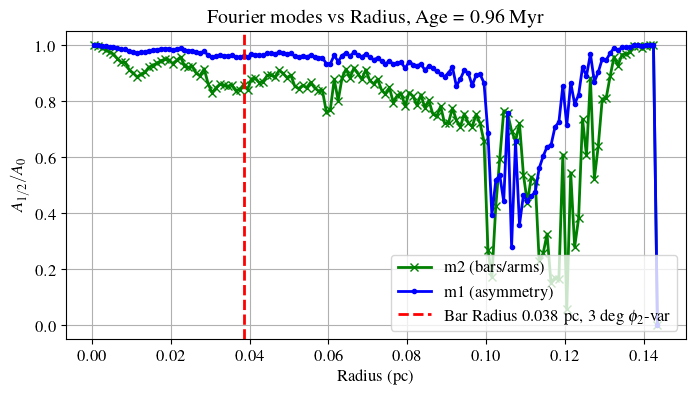

yt : [INFO     ] 2023-10-26 14:51:28,826 Parameters: current_time              = 21.953918346113
yt : [INFO     ] 2023-10-26 14:51:28,827 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 14:51:28,829 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 14:51:28,830 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 14:51:28,831 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 14:51:28,832 Parameters: current_redshift          = 19.166463445747
yt : [INFO     ] 2023-10-26 14:51:28,833 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 14:51:28,834 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 14:51:28,834 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 14:51:28,835 Parameters: hubble_constant           = 0.71


DD: DD0275, age: 0.96 Myr, m2 mean: 0.7838, m2 var: 0.2113, m1_avg: 0.8897, m1_var: 0.1686, Bar radius: 0.0385, Bar strength: 0.9161, m1 in bar region: 0.9782, phi_2_mean: 3.0849 deg, phi_2_var: 27.11394 deg 

ds =  DD0276


Parsing Hierarchy : 100%|██████████| 5885/5885 [00:00<00:00, 10837.81it/s]
yt : [INFO     ] 2023-10-26 14:51:29,609 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 15:00:45,146 xlim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 15:00:45,181 ylim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 15:00:45,189 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 15:00:46,164 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 15:00:47,073 Making a fixed resolution buffer of (radius) 2048 by 2048


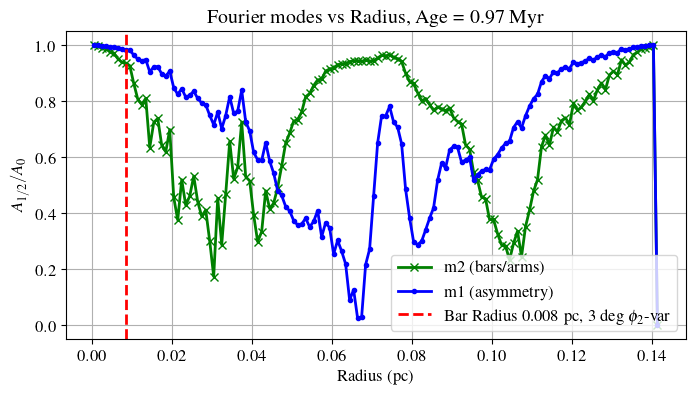

yt : [INFO     ] 2023-10-26 15:01:19,748 Parameters: current_time              = 21.955035250113
yt : [INFO     ] 2023-10-26 15:01:19,750 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 15:01:19,751 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 15:01:19,752 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 15:01:19,753 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 15:01:19,753 Parameters: current_redshift          = 19.165779420746
yt : [INFO     ] 2023-10-26 15:01:19,754 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 15:01:19,755 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 15:01:19,756 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 15:01:19,757 Parameters: hubble_constant           = 0.71


DD: DD0276, age: 0.97 Myr, m2 mean: 0.7052, m2 var: 0.2320, m1_avg: 0.6898, m1_var: 0.2588, Bar radius: 0.0085, Bar strength: 0.9758, m1 in bar region: 0.9939, phi_2_mean: -20.3328 deg, phi_2_var: 45.00211 deg 

ds =  DD0277


Parsing Hierarchy : 100%|██████████| 5768/5768 [00:00<00:00, 13623.45it/s]
yt : [INFO     ] 2023-10-26 15:01:20,418 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 15:10:43,719 xlim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 15:10:43,762 ylim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 15:10:43,770 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 15:10:44,930 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 15:10:45,691 Making a fixed resolution buffer of (radius) 2048 by 2048


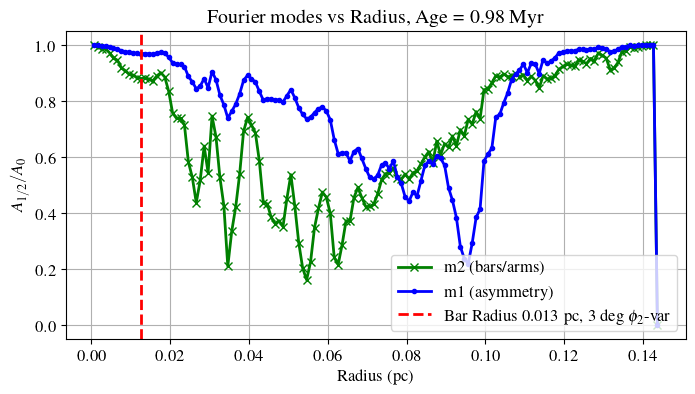

yt : [INFO     ] 2023-10-26 15:11:13,523 Parameters: current_time              = 21.956152154113
yt : [INFO     ] 2023-10-26 15:11:13,524 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 15:11:13,525 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 15:11:13,526 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 15:11:13,527 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 15:11:13,527 Parameters: current_redshift          = 19.165095453743
yt : [INFO     ] 2023-10-26 15:11:13,528 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 15:11:13,529 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 15:11:13,530 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 15:11:13,530 Parameters: hubble_constant           = 0.71


DD: DD0277, age: 0.98 Myr, m2 mean: 0.6927, m2 var: 0.2393, m1_avg: 0.7885, m1_var: 0.2085, Bar radius: 0.0126, Bar strength: 0.9449, m1 in bar region: 0.9860, phi_2_mean: 30.8901 deg, phi_2_var: 36.48392 deg 

ds =  DD0278


Parsing Hierarchy : 100%|██████████| 5670/5670 [00:00<00:00, 16653.77it/s]
yt : [INFO     ] 2023-10-26 15:11:14,051 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 15:20:46,003 xlim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 15:20:46,044 ylim = -0.000003 0.000003
yt : [INFO     ] 2023-10-26 15:20:46,055 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 15:20:47,183 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 15:20:48,058 Making a fixed resolution buffer of (radius) 2048 by 2048


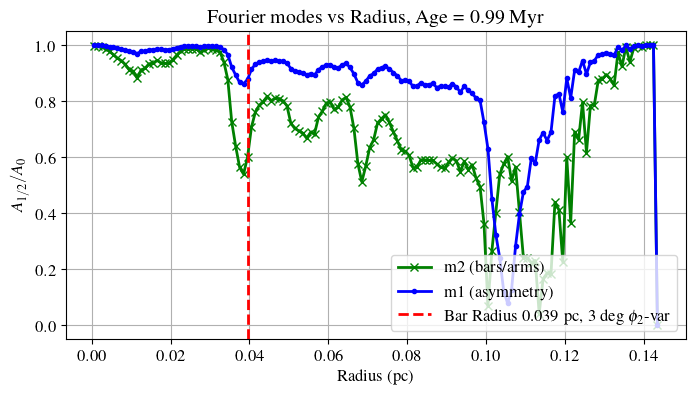

DD: DD0278, age: 0.99 Myr, m2 mean: 0.7127, m2 var: 0.2359, m1_avg: 0.8628, m1_var: 0.1951, Bar radius: 0.0395, Bar strength: 0.9205, m1 in bar region: 0.9779, phi_2_mean: 7.9615 deg, phi_2_var: 27.87731 deg 



In [11]:
with open("bar_strengths_and_phase_angle_width_pc_0.2.txt", "a") as f:
    for d, ds in enumerate(ds_list):
        width_pc = 0.2
        
        # Load dataset
        sim_label = tidy_data_labels(extract_simulation_name(ds.directory))
        sim_label = sim_label.replace("-2", "")
        sim_label = sim_label.replace("RS", "")
        if d == 0:
            f.write("Simulation: {} , width_pc: {}, phi2 angle limit: 3 deg\n".format(sim_label, width_pc))

        # Grab bh properties and define center, width, and resolution of sliceplots
        ss_pos, ss_mass, ss_age = ss_properties(ds, velocity=False)
        age = ss_age[0]/1e6 * yt.units.Myr
        center = ss_pos
        npixels = 2048

        # Obtain angular momentum vector from a small disk and define a larger disk for plotting
        disc_r_pc = disc_h_pc = 0.01
        dx = ds.index.get_smallest_dx().in_units('cm')
        _, L = _make_disk_L(ds, center, disc_r_pc, disc_h_pc)
        vecs = ortho_find(L)
        dir = vecs[0]
        north = vecs[1]
        disc_r_pc_big = disc_h_pc_big = 0.6
        disk = ds.disk(center, L, disc_r_pc_big, disc_h_pc_big)
        density, radius_pc = field_from_sliceplot("density", ds, disk, center, width_pc, north, dir, npixels=npixels, radius=True)
        surface_density = density * dx # g/cm^2

        # unpack bar strength function
        # Determine maximum and minimum radii from data
        r_min = np.min(radius_pc).value
        r_max = np.max(radius_pc).value
        
        # List of radii to define annular regions with thickness dr
        dr = 0.001
        radii = np.arange(r_min, r_max + dr, dr) # 73

        # area, density, theta values
        dV = dx**3
        densities = density
        theta = get_theta_values(surface_density)

        # Compute bar strength and phase angle variability across discrete annular regions
        bar_strengths = []
        m1_strengths = []
        phi_2_values = []
        phi_1_values = []

        # Loop through annular regions
        for r in radii:
            mask = (radius_pc >= r) & (radius_pc < r + dr)

            # Get densities and thetas for this annular region, where 0 < theta < 2pi
            masked_densities = densities[mask]
            theta_2d = np.tile(theta, (densities.shape[0], 1))
            masked_theta = theta_2d[mask]

            # Compute the mass-equivalent for each cell in this region
            mass_equivalent = masked_densities * dV

            # Compute a_2 and b_2 coefficients for m=2 mode
            a_2 = np.sum(mass_equivalent * np.cos(2 * masked_theta))
            b_2 = np.sum(mass_equivalent * np.sin(2 * masked_theta))

            # for the m = 1 mode
            a_1 = np.sum(mass_equivalent * np.cos(masked_theta))
            b_1 = np.sum(mass_equivalent * np.sin(masked_theta))

            # Compute A_0 for this region
            A_0 = np.sum(mass_equivalent)

            # Compute A_2 for this region
            A_2 = np.sqrt(a_2**2 + b_2**2)
            A_1 = np.sqrt(a_1**2 + b_1**2)

            # Compute the bar strength for this region
            bar_strength = A_2 / A_0 if A_0 != 0 else 0
            m1_strength = A_1 / A_0 if A_0 != 0 else 0
            bar_strengths.append(bar_strength)
            m1_strengths.append(m1_strength)

            # Compute the phase angle phi_2 for this region, where -90 < phi_2 < 90
            phi_2 = 0.5 * np.degrees(np.arctan2(b_2, a_2).value)
            phi_1 = np.degrees(np.arctan2(b_1, a_1).value)
            phi_2_values.append(phi_2)
            phi_1_values.append(phi_1)

        # Compute the standard deviation for phi_2 values across all annular regions
        phi_2_var = np.std(phi_2_values) # want this to be small < 3 deg
        phi_2_mean = np.mean(phi_2_values)
        m2_var = np.std(bar_strengths)
        m2_avg = np.mean(bar_strengths)
        m1_avg = np.mean(m1_strengths)
        m1_var = np.std(m1_strengths)

        # Find the radius of the bar feature
        var_deg = 3 # degrees
        bar_radius, i = find_bar_radius(phi_2_values, radii, var_deg=var_deg)
        bar_strength = np.mean(bar_strengths[:i])
        m1_strength = np.mean(m1_strengths[:i])

        # Plot bar strength vs radius
        plt.figure(figsize=(8, 4))
        plt.title('Fourier modes vs Radius, Age = {:.2f}'.format(age))
        plt.plot(radii, bar_strengths, label='m2 (bars/arms)', marker='x', color='green')
        plt.plot(radii, m1_strengths, label='m1 (asymmetry)', marker='.', color='blue')
        plt.axvline(bar_radius, color='red', linestyle='--', label=r'Bar Radius {:.3f} pc, {} deg $\phi_2$-var'.format(bar_radius, var_deg))
        plt.yscale('linear')
        plt.xlabel('Radius (pc)')
        plt.ylabel(r'$A_{1/2} / A_0$')
        plt.grid(True)
        plt.legend(loc='lower right')
        plt.savefig('bars/fourier_modes_vs_radius_{}_{}.png'.format(sim_label, extract_dd_segment(ds.directory)), bbox_inches='tight')
        plt.show()
        # Print and write to file
        info = "DD: {}, age: {:.2f}, m2 mean: {:.4f}, m2 var: {:.4f}, m1_avg: {:.4f}, m1_var: {:.4f}, Bar radius: {:.4f}, Bar strength: {:.4f}, m1 in bar region: {:.4f}, phi_2_mean: {:.4f} deg, phi_2_var: {:.5f} deg \n".format(extract_dd_segment(ds.directory), age, m2_avg, m2_var, m1_avg, m1_var, bar_radius, bar_strength, m1_strength, phi_2_mean, phi_2_var)
        print(info)
        f.write(info)

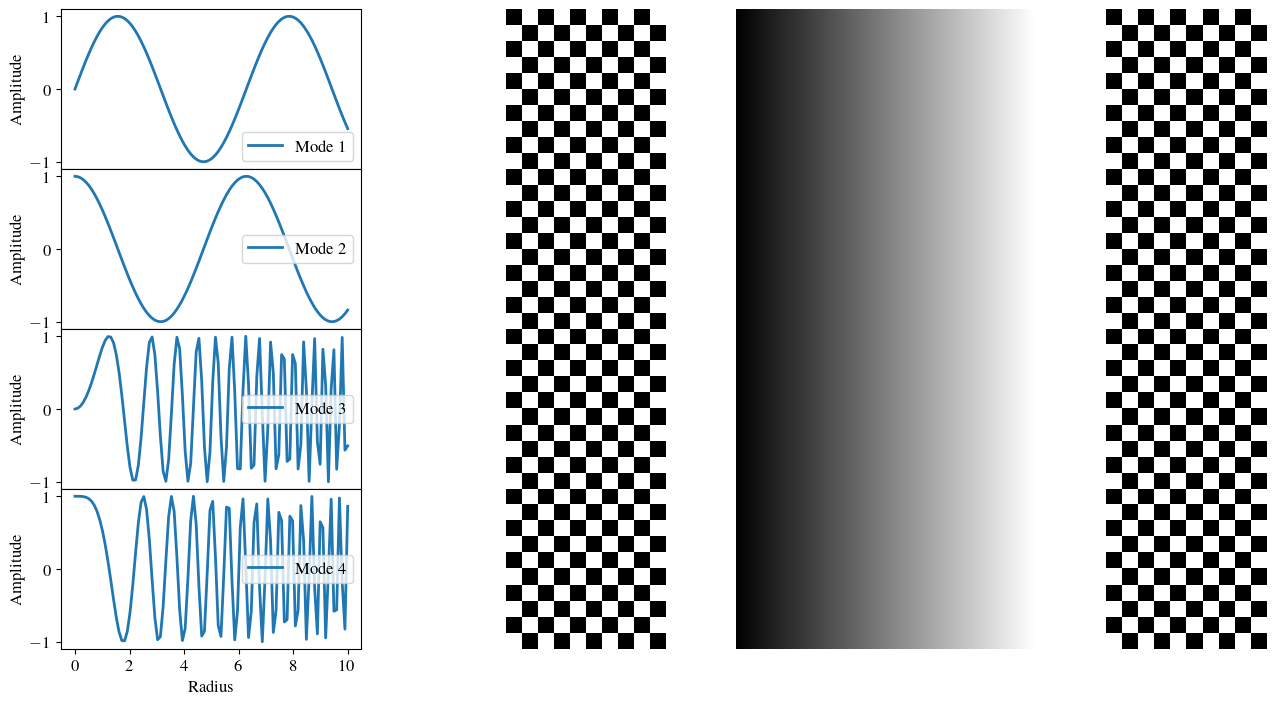

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data sets
radii = np.linspace(0, 10, 100)  # radius
y_modes = [np.sin(radii), np.cos(radii), np.sin(radii**2), np.cos(radii**2)]

# Create a figure
fig = plt.figure(figsize=(15, 8))

# Define image grid dimensions
nrows, ncols = 4, 3

# Generate checkerboard pattern
checkerboard = np.zeros((10, 10))
checkerboard[1::2, ::2] = 1
checkerboard[::2, 1::2] = 1

# Generate gradient pattern
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

# Define subplot dimensions
size = 0.2

# Plot images and Fourier modes
for row in range(nrows):
    # Fourier Mode Plot
    y = y_modes[row]
    ax_fourier = fig.add_axes([0.05, 0.8 - row*size, size, size])
    ax_fourier.plot(radii, y, label=f"Mode {row + 1}")
    if row == 3:
        ax_fourier.set_xlabel("Radius")
    ax_fourier.set_ylabel("Amplitude")
    ax_fourier.legend()
    if row != 3:
        ax_fourier.set_xticks([])
    
    # Image Grid Plot
    for col in range(ncols):
        ax_img = fig.add_axes([0.3 + col*size, 0.8 - row*size, size, size])
        if col % 2 == 0:
            ax_img.imshow(checkerboard, cmap='gray')
        else:
            ax_img.imshow(gradient, cmap='gray', aspect='auto')
        ax_img.axis('off')

plt.show()


yt : [INFO     ] 2023-10-26 17:36:29,863 Parameters: current_time              = 13.978129220193
yt : [INFO     ] 2023-10-26 17:36:29,865 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-26 17:36:29,866 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-26 17:36:29,867 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-10-26 17:36:29,868 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-26 17:36:29,870 Parameters: current_redshift          = 26.248841713069
yt : [INFO     ] 2023-10-26 17:36:29,871 Parameters: omega_lambda              = 0.734
yt : [INFO     ] 2023-10-26 17:36:29,871 Parameters: omega_matter              = 0.266
yt : [INFO     ] 2023-10-26 17:36:29,872 Parameters: omega_radiation           = 0
yt : [INFO     ] 2023-10-26 17:36:29,873 Parameters: hubble_constant           = 0.71
yt : [INFO     ] 2023-10-26 17:36:30,014 Parameters: current_time              = 13.990415164193
yt :

Plotting 1B.m16 DD0167
ds =  DD0167


Parsing Hierarchy : 100%|██████████| 2374/2374 [00:00<00:00, 16173.79it/s]
yt : [INFO     ] 2023-10-26 17:36:30,588 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 17:38:54,914 xlim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:38:54,956 ylim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:38:54,962 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 17:38:55,626 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 17:38:56,311 Making a fixed resolution buffer of (radius) 2048 by 2048
yt : [INFO     ] 2023-10-26 17:40:33,462 xlim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:40:33,497 ylim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:40:33,500 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800
yt : [INFO     ] 2023-10-26 17:40:34,206 Making a fixed resolution buffer of (('gas', 'number_density')) 2048 by 2048


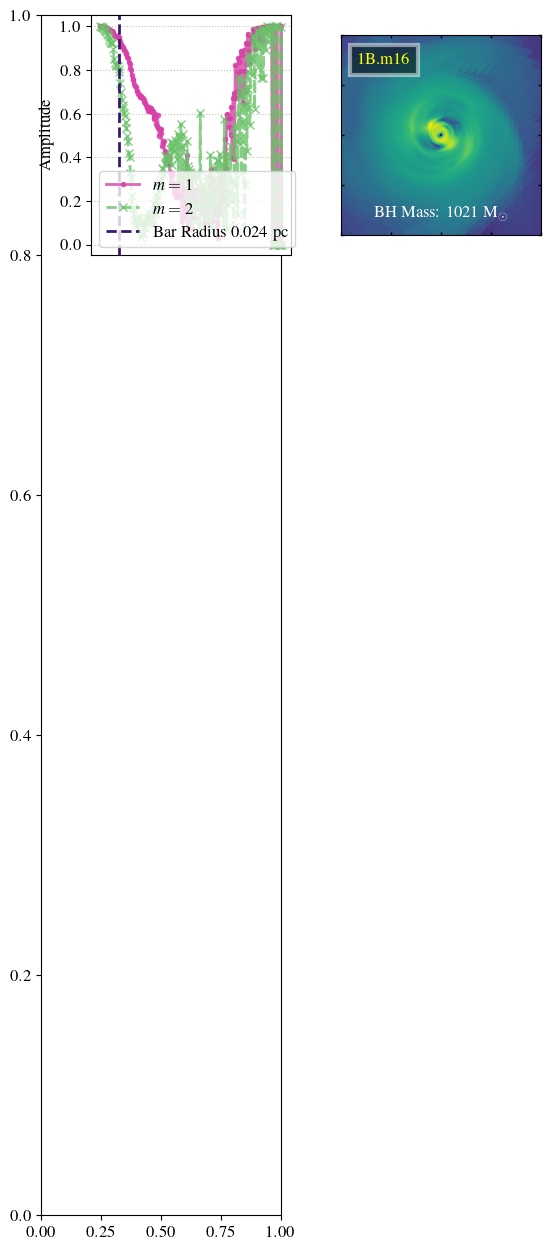

yt : [INFO     ] 2023-10-26 17:41:43,741 xlim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:41:43,780 ylim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:41:43,784 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 17:41:44,578 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 17:41:45,569 Making a fixed resolution buffer of (('gas', 'sound_speed')) 2048 by 2048
yt : [INFO     ] 2023-10-26 17:42:51,492 Making a fixed resolution buffer of (velocity_cylindrical_theta) 2048 by 2048
yt : [INFO     ] 2023-10-26 17:44:01,638 Making a fixed resolution buffer of (radius) 2048 by 2048
yt : [INFO     ] 2023-10-26 17:45:04,060 xlim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:45:04,097 ylim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:45:04,101 Making a fixed resolution buffer of (('gas', 'velocity_cylindrical_radius')) 800 by 800
yt : [INFO     ] 2023-10-26 17:45:05,059 Making a 

Plotting 1B.m16 DD0178
ds =  DD0178


Parsing Hierarchy : 100%|██████████| 2519/2519 [00:00<00:00, 19619.86it/s]
yt : [INFO     ] 2023-10-26 17:45:06,784 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2023-10-26 17:47:58,343 xlim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:47:58,389 ylim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:47:58,397 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2023-10-26 17:47:59,189 Making a fixed resolution buffer of (('gas', 'density')) 2048 by 2048
yt : [INFO     ] 2023-10-26 17:48:00,011 Making a fixed resolution buffer of (radius) 2048 by 2048
yt : [INFO     ] 2023-10-26 17:49:59,871 xlim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:49:59,923 ylim = -0.000006 0.000006
yt : [INFO     ] 2023-10-26 17:49:59,926 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800
yt : [INFO     ] 2023-10-26 17:50:00,649 Making a fixed resolution buffer of (('gas', 'number_density')) 2048 by 2048
yt : [INFO    

KeyboardInterrupt: 

In [37]:
import yt
import cmyt
import os
from matplotlib import ticker
from smartstar_find import ss_properties
from plot_disc_projections import _make_disk_L
from plot_multi_projections import tidy_data_labels
from yt.utilities.math_utils import ortho_find
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from plot_toomre_q_projection import toomre_from_sliceplot, field_from_sliceplot
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.offsetbox import AnchoredText
from plot_radial_profile_from_frb import extract_simulation_name, extract_dd_segment
import matplotlib.colors as mcolors
from find_fourier_modes import get_theta_values, find_bar_radius

def find_fourier_modes_and_phase_angles(radii, radius_pc, densities, theta, dV, dr=0.001):
    """
    Compute the m=1, 2 Fourier mode strengths and phase angles for a given annular region of a disk.
    Input:
        radii: list of radii for annular regions
        radius_pc: 2D array of radii values for each cell in the disk
        densities: 2D array of densities values for each cell in the disk
        theta: 2D array of theta values for each cell in the disk
        dV: volume of each cell in the disk
        dr: thickness of annular regions
    Output:
        m1_strengths: list of m=1 Fourier mode strengths for each annular region
        m2_strengths: list of m=2 Fourier mode strengths for each annular region
        phi_1_values: list of m=1 Fourier mode phase angles for each annular region
        phi_2_values: list of m=2 Fourier mode phase angles for each annular region
    """
    m1_strengths = []
    m2_strengths = []
    phi_1_values = []
    phi_2_values = []
    for r in radii:
        mask = (radius_pc >= r) & (radius_pc < r + dr)

        # Get densities and thetas for this annular region, where 0 < theta < 2pi
        masked_densities = densities[mask]
        theta_2d = np.tile(theta, (densities.shape[0], 1))
        masked_theta = theta_2d[mask]

        # Compute the mass-equivalent for each cell in this region
        mass_equivalent = masked_densities * dV

        # Compute a_2 and b_2 coefficients for m=2 mode
        a_2 = np.sum(mass_equivalent * np.cos(2 * masked_theta))
        b_2 = np.sum(mass_equivalent * np.sin(2 * masked_theta))

        # for the m = 1 mode
        a_1 = np.sum(mass_equivalent * np.cos(masked_theta))
        b_1 = np.sum(mass_equivalent * np.sin(masked_theta))

        # Compute A_0 for this region
        A_0 = np.sum(mass_equivalent)

        # Compute A_2 for this region
        A_2 = np.sqrt(a_2**2 + b_2**2)
        A_1 = np.sqrt(a_1**2 + b_1**2)

        # Compute the bar strength for this region
        bar_strength = A_2 / A_0 if A_0 != 0 else 0
        m1_strength = A_1 / A_0 if A_0 != 0 else 0
        m2_strengths.append(bar_strength)
        m1_strengths.append(m1_strength)

        # Compute the phase angle phi_2 for this region, where -90 < phi_2 < 90
        phi_2 = 0.5 * np.degrees(np.arctan2(b_2, a_2).value)
        phi_1 = np.degrees(np.arctan2(b_1, a_1).value)
        phi_2_values.append(phi_2)
        phi_1_values.append(phi_1)

    return m1_strengths, m2_strengths, phi_1_values, phi_2_values



root_dir = [#"/ceph/cephfs/sgordon/cirrus-runs-rsync/seed2-bh-only/seed2-bh-only/270msun/replicating-beckmann-2/",
            #"/ceph/cephfs/sgordon/pleiades/seed2-bh-only/270msun/replicating-beckmann-2/2B.RSb08/"
            "/ceph/cephfs/sgordon/pleiades/seed1-bh-only/270msun/replicating-beckmann/"
            ]
sim = [#"2B.RSm04", 
       #"2B.m08-4dx"
       "1B.m16-4dx"
       #"2B.RSb08-2"
       ] 

dds = ["DD0167/DD0167", "DD0178/DD0178", "DD0189/DD0189", "DD0231/DD0231"]  # 0.39, 0.50, 0.6, 1 Myr for 1B.m16,
#dds3 = ["DD0228/DD0228", "DD0268/DD0268", "DD0280/DD0280"]  # 0.3, 0.69, 0.79 Myr for 2B.m08-4dx, 
#dds = ["DD0219/DD0219", "DD0227/DD0227", "DD0236/DD0236", "DD0279/DD0279"]  # 0.2, 0.69, 1 Myr for 2B.b08,

DS = []
for s in range(len(dds)):
    ds = yt.load(os.path.join(root_dir[0], sim[0], dds[s]))
    DS.append(ds)

#### PLOT ####

fig = plt.figure(figsize=(10, 12))
ax_fourier = fig.add_axes([0, 0, 0.24, 1])

# IMAGE GRID #
nrows = 4
ncols = 3
#grid = ImageGrid(fig, (0.1, 0.12, 0.60, 0.95), nrows_ncols=(nrows, ncols), axes_pad=0.0, share_all=True, cbar_mode=None)
#grid = ImageGrid(fig, (0.25, 0.0, 0.75, 1.0), nrows_ncols=(nrows, ncols), axes_pad=0.0, share_all=True, cbar_mode=None)
plt.rcParams['text.usetex'] = True

# Plot data and annotations
grid_index = 0
size = 0.2 # subplot dims
for row in range(nrows):
    ax_fourier = fig.add_axes([0.05, 0.8 - row*size, size, size])

    # Load dataset and define axis
    ds = DS[row]
    sim_label = tidy_data_labels(extract_simulation_name(ds.directory))
    sim_label = sim_label.replace("-2", "")
    sim_label = sim_label.replace("RS", "")
    print("Plotting " + str(sim_label) + " " + str(extract_dd_segment(ds.directory)))

    # Grab bh properties and define center, width and resolution of sliceplots
    ss_pos, ss_mass, ss_age = ss_properties(ds, velocity=False)
    center = ss_pos
    width_pc = 0.32
    tick_labels = ['', '-0.08', '0.0', '0.08', '']
    npixels = 2048
    dx = ds.index.get_smallest_dx().in_units('cm')

    # Obtain angular momentum vector from small disk and define larger disk for plotting
    disc_r_pc = disc_h_pc = 0.01
    _, L = _make_disk_L(ds, center, disc_r_pc, disc_h_pc)
    vecs = ortho_find(L)
    dir = vecs[0]
    north = vecs[1]
    disc_r_pc_big = disc_h_pc_big = 1.0
    disk = ds.disk(center, L, disc_r_pc_big, disc_h_pc_big)

    # fourier modes
    density, radius_pc = field_from_sliceplot("density", ds, disk, center, width_pc, north, dir, npixels=npixels, radius=True)
    surface_density = density * dx # g/cm^2
    
    # List of radii to define annular regions with thickness dr
    dr = 0.001
    r_min = np.min(radius_pc).value
    r_max = np.max(radius_pc).value
    radii = np.arange(r_min, r_max + dr, dr) # 73

    # Compute bar strength and phase angle variability across discrete annular regions
    dV = dx**3
    theta = get_theta_values(surface_density)
    m1_strengths, m2_strengths, phi_1_values, phi_2_values = find_fourier_modes_and_phase_angles(radii, radius_pc, density, theta, dV, dr)

    # Find radius of the bar feature
    var_deg = 3 # degrees
    bar_radius, i = find_bar_radius(phi_2_values, radii, var_deg=var_deg)
    bar_strength = m2_strengths[i]

    # Plot bar strength and phase angle variability across discrete annular regions
    c1 = (0.843, 0.255, 0.655)
    c2 = (0.4157, 0.7608, 0.4118)
    c3 = (0.227, 0.090, 0.447)
    ax_fourier.plot(radii, m1_strengths, color=c1, linestyle='solid', marker='.', label=r'$m=1$', alpha=0.8)
    ax_fourier.plot(radii, m2_strengths, color=c2, linestyle='dashed', marker='x', label=r'$m=2$', alpha=0.8)
    ax_fourier.axvline(x=bar_radius, color=c3, linestyle='dashed', label='Bar Radius {:.3f} pc'.format(bar_radius), alpha=1)
    ax_fourier.grid(color='grey', linestyle='dotted', alpha=0.5)
    if row == 3:
        ax_fourier.set_xlabel(r'$\rm Radius \, (pc)$', fontsize=14)
    else:
        ax_fourier.set_xticks([])
    ax_fourier.set_ylabel(r'$\rm Amplitude$', fontsize=12)
    if row == 0:
        ax_fourier.legend(loc='lower left', fontsize=12)

    # iterate over columns
    for column in range(ncols):

        grid_index = row * ncols + column
        ax = fig.add_axes([0.3 + column*size, 0.8 - row*size, size, size])
        #ax = grid[grid_index]

        if column == 0:
            # density
            cmap = 'viridis'
            min_n=9e3
            max_n=4e9
            n = field_from_sliceplot("number_density", ds, disk, center, width_pc, north, dir, npixels=npixels)
            im1 = ax.imshow(n, cmap=cmap, origin="lower", norm=LogNorm())
            im1.set_clim(min_n, max_n)
        elif column == 1:
            # toomre q  
            cmap = 'cubehelix'
            cmap = plt.get_cmap(cmap)
            minval = 0.0
            maxval = 0.8
            n = 100
            cmap = mcolors.LinearSegmentedColormap.from_list('trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval), cmap(np.linspace(minval, maxval, n)))
            min_n=1
            max_n=1e3
            q = toomre_from_sliceplot(ds, disk, center, width_pc, north, dir, npixels=npixels)
            im2 = ax.imshow(q, cmap=cmap, origin="lower", norm=LogNorm())
            im2.set_clim(min_n, max_n)
        elif column == 2:
            # cylindrical_radial_velocity (add this part)
            cmap = cmyt.kelp  # divergine, 'coolwarm, 'rainbow'
            cmap = "magma"
            min_v = -13       
            max_v = 4    
            velocity = field_from_sliceplot("velocity_cylindrical_radius", ds, disk, center, width_pc, north, dir, npixels=npixels).to("km/s")
            im3 = ax.imshow(velocity, cmap=cmap, origin="lower")
            im3.set_clim(min_v, max_v)

        # Add annotations
        if grid_index == 0:
            at = AnchoredText(sim_label, loc='upper left', frameon=True, bbox_to_anchor=(0.01, 0.99), bbox_transform=ax.transAxes)
            at.txt._text.set_color("yellow")
            at.txt._text.set_fontsize(12)
            at.patch.set(boxstyle="square,pad=0.05", facecolor="black", linewidth=3, edgecolor="white", alpha=0.5)
            ax.add_artist(at)

        if column == 0:
            # Add BH mass annotation to first column
            at = AnchoredText(r"BH Mass: {:.0f} M$_\odot$".format(ss_mass.d), loc='lower center', frameon=False, bbox_transform=ax.transAxes)
            at.txt._text.set_color("white")
            at.txt._text.set_fontsize(12)
            ax.add_artist(at)

            # Add BH age annotation to leftmost y-labels
            #ax.set_ylabel("{:.2f} Myr".format((ss_age[0]/1e6)), fontsize=14)

        if column == 1:
            # Add BH Age annotation to second column
            at = AnchoredText(r"BH Age: {:.2f} Myr".format((ss_age[0]/1e6)), loc='lower right', frameon=False, bbox_transform=ax.transAxes)
            at.txt._text.set_color("black")
            at.txt._text.set_fontsize(12)
            ax.add_artist(at)

        # Set ticks and ticklabels
        ticks = np.linspace(-width_pc/2, width_pc/2, num=5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        if row == 3:
            ax.set_xticklabels(tick_labels, fontsize=14)
            ax.set_xlabel("(pc)", fontsize=14)

        # Set tick parameters to create 'inner' ticks
        ax.tick_params(axis='both', direction='in', top=True, right=True, length=2, width=1, colors='black', grid_color='black', grid_alpha=0.5)
        ax.tick_params(which='minor', length=1)
    
        # Set Tick Locations (example with numpy's linspace, adjust as necessary)
        ax.set_xticks(np.linspace(0, npixels, num=5))  # Adjust num for number of ticks
        ax.set_yticks(np.linspace(0, npixels, num=5))  # Adjust num for number of ticks
        plt.show()

# Adjust colorbars' positions and add a new one
cbar_ax1 = fig.add_axes([0.102, 0.885, 0.15, 0.01])
cbar_ax2 = fig.add_axes([0.265, 0.885, 0.15, 0.01])
cbar_ax3 = fig.add_axes([0.425, 0.885, 0.15, 0.01])

cbar1 = plt.colorbar(im1, cax=cbar_ax1, orientation='horizontal', ticklocation='top')
cbar2 = plt.colorbar(im2, cax=cbar_ax2, orientation='horizontal', ticklocation='top')
cbar3 = plt.colorbar(im3, cax=cbar_ax3, orientation='horizontal', ticklocation='top')

# Adding titles above colorbars
fig.text(0.18, 0.872, 'Fourier Modes Radial Profile', ha='center', va='center')
fig.text(0.32, 0.872, r'Number Density ($\rm cm^{-3}$)', ha='center', va='center')
fig.text(0.48, 0.872, r'Toomre $Q$', ha='center', va='center')
fig.text(0.62, 0.872, r'Radial Velocity ($\rm km/s$)', ha='center', va='center')  # Adjust this title as necessary

# save
plot_name = 'sliceplot-timeseries-' + str(sim_label) + '-' + str(width_pc) + 'pc-fourier_modes-toomreq-radial_vel_r=' + str(disc_r_pc) + 'pc.pdf'
plt.savefig('plots/' + plot_name, bbox_inches='tight')
print("created plots/" + str(plot_name))
plt.close()
